In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [245]:
train=pd.read_csv("train.csv")

In [246]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


LoanAmount            Loan amount in thousands

Loan_Amount_Term      Term of loan in months

Credit_History        Credit history meets guidelines

Property_Area         Urban/ Semi Urban/ Rural

Loan_Status           Loan approved (Y/N)

In [247]:
len(train)

614

In [248]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Preparing the data for the ML Models

In [249]:
# dealing with nans
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [316]:
from sklearn.preprocessing import LabelEncoder
list_encoders=[]
from sklearn.preprocessing import StandardScaler
coulmns=None
scalar=None
means=None
def preProcessDataTrain(train):
    global means, scalar
# High Nans in gender, married, dependents, self_employed, loanAmount, loanTerms, credit_history
    NaColsCats=['Gender','Married','Dependents','Self_Employed']
#     for x in NaColsCats:
#         print(train[x].value_counts(),end='\n\n')
    train['Gender']=train['Gender'].fillna('Male')
    train['Married']=train['Married'].fillna('Yes')
    train['Dependents']=train['Dependents'].fillna('0')
    train['Self_Employed']=train['Self_Employed'].fillna('No')
    train['Credit_History']=train['Credit_History'].fillna('1')
#     filling the nas with mean for numeric real values
    means=train.mean()
    train=train.fillna(train.mean())
    global list_encoders
    global columns
    columns=['Gender','Married','Education','Self_Employed','Property_Area']
    for c in columns:
        cEncoder=LabelEncoder()
        train[c]=cEncoder.fit_transform(train[c].astype('str'))
        list_encoders.append(cEncoder)
    
#     coverting 3+ in train to 3
    train['Dependents']=train['Dependents'].replace(['3+'], '3')
    train['Loan_Status']=train['Loan_Status'].replace(['Y','N'],[1,0])
    # coverting dependents column to integer
    train['Dependents']=train['Dependents'].astype(str).astype(int)
    
#     no one hot encode the columns 
    col_to_one_hot=['Gender','Married','Education','Self_employed']
#     I dont think there is some need to one hot the columns, It would introduce the co linearity in the dataset
    
    train.drop(['Loan_ID'],axis=1,inplace=True)
    scalar = StandardScaler()
    train_big_num=train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
    scalar.fit(train_big_num)
#     print(scaler.mean_)

    train_np=scalar.transform(train_big_num)
    
    scaled_features=pd.DataFrame(data=train_np,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])
    
    sc_feat=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
    for sf in sc_feat:
        train[sf]=scaled_features[sf]
    return train

Let us one Hot encode some of the columns because numeric assignmnet does not make a sense

Columns are Gender, Married, Education, Self_employed



I prefer using sklearn.preprocessing.OneHotEncoder instead of pd.get_dummies This is because sklearn.preprocessing.OneHotEncoder returns an object of sklearn.preprocessing.OneHotEncoder class. We can fit this object on the training set and then use the same object to transform the test set. On the other hand, pd.get_dummies returns a dataframe with encodings based on the values in the dataframe we pass to it. This might be good for a quick analysis, but for an extended model building project where you train on training set and will be later testing on a test set, I would suggest using sklearn.preprocessing.OneHotEncoder.

In [317]:
train_pp=preProcessDataTrain(train)

In [318]:
print(scalar,'\n\n',means)

StandardScaler(copy=True, with_mean=True, with_std=True) 

 ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
dtype: float64


In [319]:
# seeing all the lebels
for x,c in zip(list_encoders,columns):
    print('classes are ',x.classes_,' in ',c)


classes are  ['Female' 'Male']  in  Gender
classes are  ['No' 'Yes']  in  Married
classes are  ['Graduate' 'Not Graduate']  in  Education
classes are  ['No' 'Yes']  in  Self_Employed
classes are  ['Rural' 'Semiurban' 'Urban']  in  Property_Area


In [320]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [321]:
train_pp.head(-5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,0.000000,0.279851,1,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.279851,1,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.279851,1,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.279851,1,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.279851,1,2,1
5,1,1,2,0,1,0.002218,0.880600,1.436099,0.279851,1,2,1
6,1,1,0,1,0,-0.503019,-0.035995,-0.612275,0.279851,1,2,1
7,1,1,3,0,0,-0.387850,0.301914,0.138001,0.279851,0,1,0
8,1,1,2,0,0,-0.228939,-0.032575,0.257093,0.279851,1,2,1
9,1,1,1,0,0,1.218457,3.196713,2.412650,0.279851,1,1,0


In [322]:
X=train_pp.drop(['Loan_Status'],axis=1)

In [323]:
Y=train_pp[['Loan_Status']]

In [324]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

##### Model 1

Making Logistic Regression

In [325]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf_lr = LogisticRegression(penalty='l1',random_state=0,solver='liblinear',max_iter=1000,n_jobs=1)
clf_lr=clf_lr.fit(x_train, np.squeeze(y_train.values))
train_preds=clf_lr.predict(x_train)
train_acc=accuracy_score(y_train, train_preds)
print('train acc is ',train_acc)

print(clf_lr)

test_preds=clf_lr.predict(x_test)
test_acc=accuracy_score(y_test,test_preds)
print('test acc is ',test_acc)

train acc is  0.8150851581508516
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=1, penalty='l1', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
test acc is  0.7980295566502463


In [326]:
np.savetxt('lr.txt',train_preds,delimiter=',')

l1 and l2 both are giving same 81% accuracy, not much accuracy but very less overfitting

##### Model 2
Let us try SVM

In [327]:
from sklearn.svm import LinearSVC
clf_svm = LinearSVC(tol=1e-5,penalty='l2',loss='hinge',dual=True,C=1.0,verbose=1,random_state=0,max_iter=1000)
# C,max_iter to be tuned

clf_svm=clf_svm.fit(x_train, np.squeeze(y_train.values))  
print(clf_svm.coef_)
print(clf_svm.intercept_)

print(clf_svm)

train_preds=clf_svm.predict(x_train)
train_acc=accuracy_score(y_train, train_preds)
print('train acc is ',train_acc)


test_preds=clf_svm.predict(x_test)
test_acc=accuracy_score(y_test,test_preds)
print('test acc is ',test_acc)

[LibLinear][[ 4.94995433e-09 -1.80712115e-09  9.78032843e-10  4.30459313e-09
   3.13153350e-09 -2.45242830e-09 -1.07197341e-09  1.24801998e-09
   3.07897825e-09  2.00000001e+00  1.09279973e-09]]
[-1.00000002]
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=1e-05, verbose=1)
train acc is  0.8150851581508516
test acc is  0.7980295566502463


In [261]:
np.savetxt('svm.txt',train_preds,delimiter=',')

Not any good results from SVM

##### Model 3 Naive Bayes

Provide a good base Model in classification, let us see

In [328]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
print(clf_nb)
clf_nb=clf_nb.fit(x_train, np.squeeze(y_train.values))  

print(clf_nb)

print(clf_nb.get_params)

train_preds=clf_nb.predict(x_train)
train_acc=accuracy_score(y_train, train_preds)
print('train acc is ',train_acc)


test_preds=clf_nb.predict(x_test)
test_acc=accuracy_score(y_test,test_preds)
print('test acc is ',test_acc)



GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB(priors=None, var_smoothing=1e-09)
<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-09)>
train acc is  0.8150851581508516
test acc is  0.7980295566502463


In [263]:
np.savetxt('nb.txt',train_preds,delimiter=',')

##### Model 4 Decision Trees

In [329]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
# print(clf)
clf=clf.fit(x_train,np.squeeze(y_train.values))
print(clf.feature_importances_,end='\n\n\n')
train_preds=clf.predict(x_train)
train_acc=accuracy_score(y_train, train_preds)
print('train acc is ',train_acc)


test_preds=clf.predict(x_test)
test_acc=accuracy_score(y_test,test_preds)
print('test acc is ',test_acc)

[0.02264591 0.01286038 0.0470388  0.00588488 0.04621277 0.27762548
 0.09105327 0.12444637 0.03731642 0.27714152 0.0577742 ]


train acc is  1.0
test acc is  0.6798029556650246


27, 15 and 28% are top 3 feature contribution, and lots of overfitting let us do some regularisation

In [330]:
clf.feature_importances_.sum()
# and they sum to 99.99

1.0000000000000002

In [331]:
x_train.shape

(411, 11)

[Text(101.50285714285715, 211.7178947368421, 'X[9] <= 0.5\nentropy = 0.413\nsamples = 411\nvalue = [120, 291]'),
 Text(56.331428571428575, 200.2736842105263, 'X[6] <= 2.221\nentropy = 0.168\nsamples = 54\nvalue = [49, 5]'),
 Text(52.080000000000005, 188.82947368421054, 'X[5] <= -0.178\nentropy = 0.14\nsamples = 53\nvalue = [49, 4]'),
 Text(43.57714285714286, 177.38526315789474, 'X[8] <= -1.586\nentropy = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(39.32571428571429, 165.94105263157894, 'X[5] <= -0.468\nentropy = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(35.074285714285715, 154.49684210526317, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(43.57714285714286, 154.49684210526317, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(47.82857142857143, 165.94105263157894, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(60.58285714285715, 177.38526315789474, 'X[5] <= -0.063\nentropy = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(56.331428571428575, 165.94105263157894, 'entr

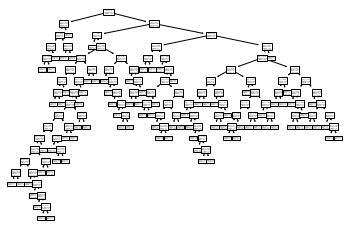

In [332]:
from sklearn import tree
tree.plot_tree(clf.fit(x_train,np.squeeze(y_train.values)))

In [333]:
clf.get_depth()

18

Let us limit the depth to 5 say

In [334]:
clf_dt = DecisionTreeClassifier(random_state=0,max_depth=5)
# print(clf,end='\n\n')
clf_dt=clf_dt.fit(x_train,np.squeeze(y_train.values))
print('Feature Importance are ',clf_dt.feature_importances_)
# we got some better features 

train_preds=clf_dt.predict(x_train)
train_acc=accuracy_score(y_train, train_preds)
print('train acc is ',train_acc)


test_preds=clf_dt.predict(x_test)
test_acc=accuracy_score(y_test,test_preds)
print('test acc is ',test_acc)

Feature Importance are  [0.         0.02792399 0.         0.         0.04119422 0.14712109
 0.05742869 0.04024308 0.06023461 0.60176289 0.02409144]
train acc is  0.8613138686131386
test acc is  0.7339901477832512


We see Decision tree has some potential of doing better, so that is ok

Credit History is important feature

##### Let us do Grid Search 

In [335]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
parameters = {'max_depth':range(1,18),'min_samples_split' : range(10,500,20)}
clf = GridSearchCV(clf_dt, parameters, cv=3,verbose=2,n_jobs=-1,scoring=make_scorer(accuracy_score))
clf.fit(x_train, y_train)


Fitting 3 folds for each of 425 candidates, totalling 1275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 1213 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 1275 out of 1275 | elapsed:   12.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 18),
                         'min_samples_split': range(10, 500, 20)},
             pre_dispatch

In [271]:
clf.cv_results_

{'mean_fit_time': array([0.01761643, 0.01483583, 0.01163848, 0.01471631, 0.01026511,
        0.02626514, 0.00863775, 0.0121998 , 0.01414442, 0.01202313,
        0.0105412 , 0.00995398, 0.01031009, 0.01031955, 0.00899752,
        0.00972478, 0.01063848, 0.00966342, 0.01230653, 0.00931557,
        0.00921059, 0.00945203, 0.01214369, 0.0123059 , 0.01271812,
        0.00996319, 0.01027775, 0.00797892, 0.01033457, 0.00994007,
        0.0085899 , 0.00916139, 0.01324415, 0.01060772, 0.01226862,
        0.01031725, 0.01240555, 0.01274077, 0.01359399, 0.02608331,
        0.01022951, 0.01174259, 0.01522374, 0.00926884, 0.01008018,
        0.01399946, 0.01396457, 0.01060454, 0.01113343, 0.01263467,
        0.01362888, 0.01282636, 0.01130978, 0.01027203, 0.01060351,
        0.01050766, 0.01134491, 0.00991432, 0.01396894, 0.01397856,
        0.01265176, 0.01201582, 0.0109609 , 0.01163554, 0.01063871,
        0.01036302, 0.01382065, 0.01030755, 0.01063808, 0.00931025,
        0.01116347, 0.00971921,

In [336]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [337]:
clf.best_params_

{'max_depth': 1, 'min_samples_split': 10}

In [338]:
# clf = DecisionTreeClassifier(random_state=0)
# print(clf)
# clf=clf.fit(x_train,np.squeeze(y_train.values))
# print(clf.feature_importances_,end='\n\n\n')
train_preds=clf.predict(x_train)
train_acc=accuracy_score(y_train, train_preds)
print('train acc is ',train_acc)


test_preds=clf.predict(x_test)
test_acc=accuracy_score(y_test,test_preds)
print('test acc is ',test_acc)

train acc is  0.8150851581508516
test acc is  0.7980295566502463


In [275]:
np.savetxt('dt.txt',train_preds,delimiter=',')

**Is it a joke or what we have same thing with LR and SVMs .If we go with min_samples_split=2 and max_depth =1  than train accuracy is 1 and test acc=71 %**


**let us see the most important features, and exculde all the non relevant features**

In [339]:
best_dt=clf.best_estimator_
best_dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [340]:
fnames=['Gender','Married','Dependents', 'Education',
 'Self_Employed', 'ApplicantIncome',
 'CoapplicantIncome', 'LoanAmount',
 'Loan_Amount_Term', 'Credit_History',
 'Property_Area',]

[Text(167.4, 163.07999999999998, 'Credit_History <= 0.5\nentropy = 0.413\nsamples = 411\nvalue = [120, 291]\nclass = Yes'),
 Text(83.7, 54.360000000000014, 'entropy = 0.168\nsamples = 54\nvalue = [49, 5]\nclass = NO'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.319\nsamples = 357\nvalue = [71, 286]\nclass = Yes')]

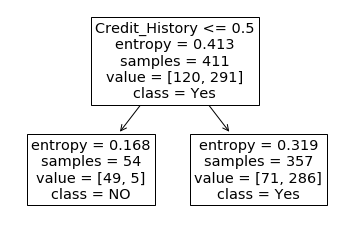

In [341]:
tree.plot_tree(best_dt,feature_names=fnames,class_names=['NO','Yes'])

Credit History seems promising

##### Work let us use Ensembling


If Ensembles also cannot Work Then use NN

##### Try Random Forest

In [342]:
from sklearn.ensemble import RandomForestClassifier

for d in range(1,18,1):    
    clf_rf = RandomForestClassifier(n_estimators=100, max_depth=d,random_state=0,bootstrap=False) 
    # max_depth,n_estimators,  to tune
    clf_rf.fit(x_train, np.squeeze(y_train.values))  
#     print(clf)
#     print(clf.feature_importances_)

    train_preds=clf_rf.predict(x_train)
    train_acc=accuracy_score(y_train, train_preds)
    print('train acc is {} at depth ={}'.format(train_acc,d))


    test_preds=clf_rf.predict(x_test)
    test_acc=accuracy_score(y_test,test_preds)
    print('test acc is {} at depth ={} '.format(test_acc,d))
    print()

train acc is 0.7469586374695864 at depth =1
test acc is 0.6896551724137931 at depth =1 

train acc is 0.8150851581508516 at depth =2
test acc is 0.7980295566502463 at depth =2 

train acc is 0.8175182481751825 at depth =3
test acc is 0.7980295566502463 at depth =3 

train acc is 0.8248175182481752 at depth =4
test acc is 0.7980295566502463 at depth =4 

train acc is 0.8442822384428224 at depth =5
test acc is 0.8029556650246306 at depth =5 

train acc is 0.8613138686131386 at depth =6
test acc is 0.8078817733990148 at depth =6 

train acc is 0.8905109489051095 at depth =7
test acc is 0.8029556650246306 at depth =7 

train acc is 0.9124087591240876 at depth =8
test acc is 0.812807881773399 at depth =8 

train acc is 0.9416058394160584 at depth =9
test acc is 0.7931034482758621 at depth =9 

train acc is 0.9659367396593674 at depth =10
test acc is 0.7832512315270936 at depth =10 

train acc is 0.9878345498783455 at depth =11
test acc is 0.7832512315270936 at depth =11 

train acc is 0.995

Let us see if we do Grid Search than we get result as above or not

**No not getting same results, some issues with GridSearch code**

In [343]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=1,random_state=0,bootstrap=False) 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
parameters = {'max_depth':range(1,18)}
clf = GridSearchCV(clf_rf, parameters, cv=3,verbose=2,n_jobs=-1,scoring=make_scorer(accuracy_score))
clf.fit(x_train, np.squeeze(y_train.values))

Fitting 3 folds for each of 17 candidates, totalling 51 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    4.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight=None,
                                              criterion='gini', max_depth=1,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn',

In [344]:
clf.cv_results_

{'mean_fit_time': array([0.31446369, 0.24434749, 0.24434741, 0.35076006, 0.36861817,
        0.26994522, 0.30378167, 0.27260439, 0.3171277 , 0.39328106,
        0.48904403, 0.43284249, 0.31515718, 0.29760806, 0.30091588,
        0.3217837 , 0.24736969]),
 'std_fit_time': array([0.00263282, 0.02690919, 0.01547243, 0.01181163, 0.02708004,
        0.01896315, 0.01680427, 0.00470179, 0.00997288, 0.04278345,
        0.03305428, 0.02361527, 0.00293623, 0.00334201, 0.01295701,
        0.02313027, 0.01006724]),
 'mean_score_time': array([0.02260613, 0.02548464, 0.03492832, 0.05659262, 0.02559813,
        0.02958814, 0.02626348, 0.02493366, 0.03332472, 0.04888161,
        0.04695264, 0.03490837, 0.02493413, 0.02785452, 0.02986582,
        0.02659583, 0.01860134]),
 'std_score_time': array([0.00094038, 0.00318374, 0.00565718, 0.00806596, 0.00204914,
        0.00384753, 0.00046952, 0.0014113 , 0.01619612, 0.00327062,
        0.01059723, 0.00407362, 0.00081459, 0.0008871 , 0.00274421,
        0.00

In [345]:
clf.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [346]:
clf.best_params_

{'max_depth': 2}

In [347]:
train_preds=clf.predict(x_train)
train_acc=accuracy_score(y_train, train_preds)
print('train acc is {}'.format(train_acc))


test_preds=clf.predict(x_test)
test_acc=accuracy_score(y_test,test_preds)
print('test acc is {} '.format(test_acc))
print()

train acc is 0.8150851581508516
test acc is 0.7980295566502463 



###### Try Boosting 
###### Try XG Boost Trees

This algorithm goes by lots of different names such as gradient boosting, multiple additive regression trees, stochastic gradient boosting or gradient boosting machines.

Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. A popular example is the AdaBoost algorithm that weights data points that are hard to predict.

Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

This approach supports both regression and classification predictive modeling problems.



In [243]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, np.squeeze(y_train.values))
print(model)

train_preds = model.predict(x_train)
train_preds = [round(value) for value in train_preds]
# model predict probs from 0 to 1 and thus we round them to app value
train_acc=accuracy_score(y_train, train_preds)
print('train acc is ',train_acc)


test_preds=model.predict(x_test)
test_acc=accuracy_score(y_test,test_preds)
print('test acc is ',test_acc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
train acc is  0.8710462287104623
test acc is  0.7980295566502463


Training Acc shot up, let us tune this https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

##### Let us Use NN

##### Day of Judgement has come

Let us make predictions on test Data

Steps : Preprocess the data and feed it to the models

In [298]:
test=pd.read_csv('test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [312]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [353]:
def preprocessTest(train):
    global means, scalar
# High Nans in gender, married, dependents, self_employed, loanAmount, loanTerms, credit_history

    train['Gender']=train['Gender'].fillna('Male')
    train['Married']=train['Married'].fillna('Yes')
    train['Dependents']=train['Dependents'].fillna('0')
    train['Self_Employed']=train['Self_Employed'].fillna('No')
    train['Credit_History']=train['Credit_History'].fillna('1')
#     filling the nas with mean for numeric real values
    train=train.fillna(means)
    global list_encoders
    global columns
#     columns=['Gender','Married','Education','Self_Employed','Property_Area']
    for c,enc in zip(columns,list_encoders):
#         cEncoder=LabelEncoder()
        train[c]=enc.transform(train[c].astype('str'))
#         list_encoders.append(cEncoder)
    
#     coverting 3+ in train to 3
    train['Dependents']=train['Dependents'].replace(['3+'], '3')
#     train['Loan_Status']=train['Loan_Status'].replace(['Y','N'],[1,0])
    # coverting dependents column to integer
    train['Dependents']=train['Dependents'].astype(str).astype(int)
    
#     no one hot encode the columns 
    col_to_one_hot=['Gender','Married','Education','Self_employed']
#     I dont think there is some need to one hot the columns, It would introduce the co linearity in the dataset
    
    train.drop(['Loan_ID'],axis=1,inplace=True)
#     scalar = StandardScaler()
    train_big_num=train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
#     scalar.fit(train_big_num)
#     print(scaler.mean_)

    train_np=scalar.transform(train_big_num)
    
    scaled_features=pd.DataFrame(data=train_np,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])
    
    sc_feat=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
    for sf in sc_feat:
        train[sf]=scaled_features[sf]
    return train

In [354]:
test_ppd=preprocessTest(test)

In [355]:
test_ppd.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,0.051857,-0.554487,-0.433638,0.279851,1,2
1,1,1,1,0,0,-0.381297,-0.041468,-0.243092,0.279851,1,2
2,1,1,2,0,0,-0.066097,0.061136,0.733459,0.279851,1,2
3,1,1,2,0,0,-0.501872,0.316278,-0.552730,0.279851,1,2
4,1,0,0,1,0,-0.348532,-0.554487,-0.814731,0.279851,1,2


In [358]:
test_ids=test['Loan_ID']

**Make Predictions and submit**

In [361]:
print(clf_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=1, penalty='l1', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [362]:
submit_preds=clf_lr.predict(test_ppd)

In [365]:
submit_preds[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [369]:
preds_series=pd.Series(submit_preds)

In [372]:
output = { 'Loan_ID': test_ids, 'Loan_Status': preds_series } 
  
result = pd.DataFrame(output) 

In [375]:
result.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [377]:
result['Loan_Status']=train['Loan_Status'].replace([1,0],['Y','N'])

In [379]:
result.to_csv('preds.csv',sep=',',header=True,index=False)